In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

ruta_excel = '/content/drive/MyDrive/DataLabXR.xlsx'  # ajusta si está en carpeta distinta

# Leer las dos hojas
df_con_filtro = pd.read_excel(ruta_excel, sheet_name='Con Filtro')
df_sin_filtro = pd.read_excel(ruta_excel, sheet_name='Sin Filtro')
#print(todas_las_hojas.keys())  # nombres de las hojas


In [ ]:
# Mostrar contenido completo
print("=== CONTENIDO HOJA: CON FILTRO ===")
print(df_con_filtro)  # Muestra todo el contenido

=== CONTENIDO HOJA: CON FILTRO ===
   espesor  Transmitancia       lnT  constante
0      0.5       0.307253  1.180053   2.360106
1      1.0       0.112111  2.188260   2.188260
2      1.5       0.048101  3.034440   2.022960
3      2.0       0.020698  3.877720   1.938860
4      2.5       0.011974  4.425000   1.770000
5      3.0       0.004961  5.306190   1.768730


In [ ]:

print("\n=== CONTENIDO HOJA: SIN FILTRO ===")
print(df_sin_filtro)  # Muestra todo el contenido


=== CONTENIDO HOJA: SIN FILTRO ===
   espesor  Transmitancia      lnT  constante
0      0.5       0.362504  1.01472    2.02944
1      1.0       0.146278  1.92224    1.92224
2      1.5       0.060262  2.80905    1.87270
3      2.0       0.024650  3.70298    1.85149
4      2.5       0.014341  4.24460    1.69784
5      3.0       0.006478  5.03937    1.67979


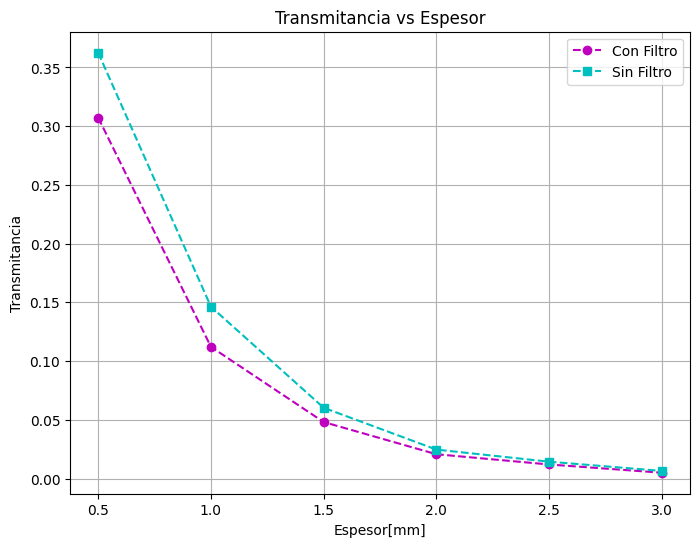

In [ ]:
df_con_filtro['lnT'] = np.log(df_con_filtro['Transmitancia'])
df_sin_filtro['lnT'] = np.log(df_sin_filtro['Transmitancia'])


# --- Gráfica 1: Transmitancia vs Espesor ---
plt.figure(figsize=(8,6))
plt.plot(df_con_filtro['espesor'], df_con_filtro['Transmitancia'],color='m', marker='o',linestyle='--' ,label='Con Filtro')
plt.plot(df_sin_filtro['espesor'], df_sin_filtro['Transmitancia'],color='c', marker='s',linestyle='--' ,label='Sin Filtro')
plt.xlabel('Espesor[mm]')
plt.ylabel('Transmitancia')
plt.title('Transmitancia vs Espesor')
plt.legend()
plt.grid(True)
plt.show()


µ con filtro = 1.6105252921333804
µ sin filtro = 1.599105965478136


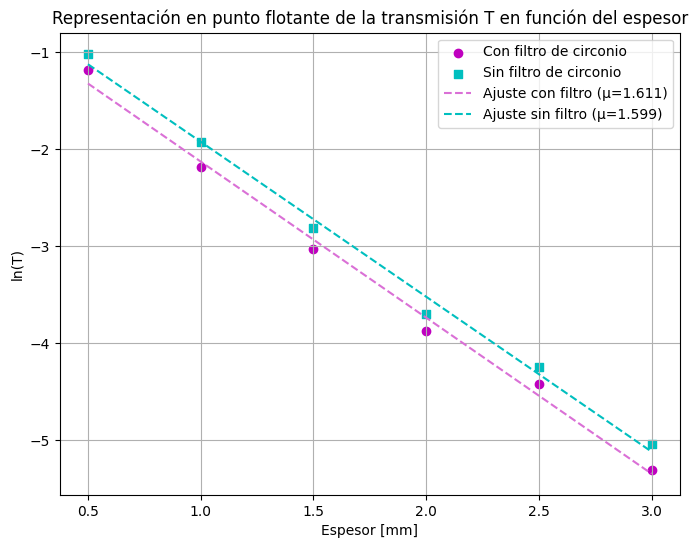

In [ ]:


# Calcular lnT
df_con_filtro['lnT'] = np.log(df_con_filtro['Transmitancia'])
df_sin_filtro['lnT'] = np.log(df_sin_filtro['Transmitancia'])

# Ajuste lineal lnT vs d
slope_con, intercept_con, r_con, p_con, stderr_con = linregress(df_con_filtro['espesor'], df_con_filtro['lnT'])
slope_sin, intercept_sin, r_sin, p_sin, stderr_sin = linregress(df_sin_filtro['espesor'], df_sin_filtro['lnT'])

mu_con = -slope_con
mu_sin = -slope_sin

print(f"µ con filtro = {mu_con}")
print(f"µ sin filtro = {mu_sin}")

x_con = np.linspace(df_con_filtro['espesor'].min(), df_con_filtro['espesor'].max(), 100)
y_con_fit = slope_con * x_con + intercept_con

x_sin = np.linspace(df_sin_filtro['espesor'].min(), df_sin_filtro['espesor'].max(), 100)
y_sin_fit = slope_sin * x_sin + intercept_sin


# --- Gráfica 2: ln(T) vs Espesor ---
plt.figure(figsize=(8,6))

#plt.plot(df_con_filtro['espesor'], df_con_filtro['lnT'], 'o-', label='Con Filtro')
#plt.plot(df_sin_filtro['espesor'], df_sin_filtro['lnT'], 's-', label='Sin Filtro')

plt.scatter(df_con_filtro['espesor'], df_con_filtro['lnT'],
            color='m', marker='o', label='Con filtro de circonio')
plt.scatter(df_sin_filtro['espesor'], df_sin_filtro['lnT'],
            color='c', marker='s', label='Sin filtro de circonio')

plt.plot(x_con, y_con_fit, color='orchid', linestyle='--', label=f'Ajuste con filtro (µ={mu_con:.3f})')
plt.plot(x_sin, y_sin_fit, color='c', linestyle='--', label=f'Ajuste sin filtro (µ={mu_sin:.3f})')

plt.xlabel('Espesor [mm]')
plt.ylabel('ln(T)')
plt.title('Representación en punto flotante de la transmisión T en función del espesor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dfmateriales = pd.read_excel(ruta_excel, sheet_name='Materiales')


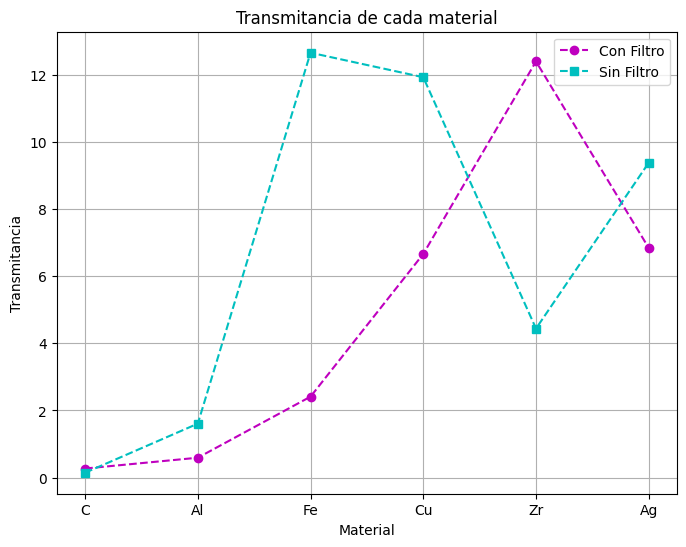

In [ ]:
#df_con_filtro['Material'] = np.log(df_con_filtro['Con Filtro'])

# --- Gráfica 3: Transmitancia vs materiales ---
plt.figure(figsize=(8,6))
plt.plot(dfmateriales['Material'], dfmateriales['USin'], 'o--', color='m' , label='Con Filtro')
plt.plot(dfmateriales['Material'], dfmateriales['UCon'], 's--', color='c' , label='Sin Filtro')
plt.xlabel('Material')
plt.ylabel('Transmitancia')
plt.title('Transmitancia de cada material')
plt.legend()
plt.grid(True)
plt.show()


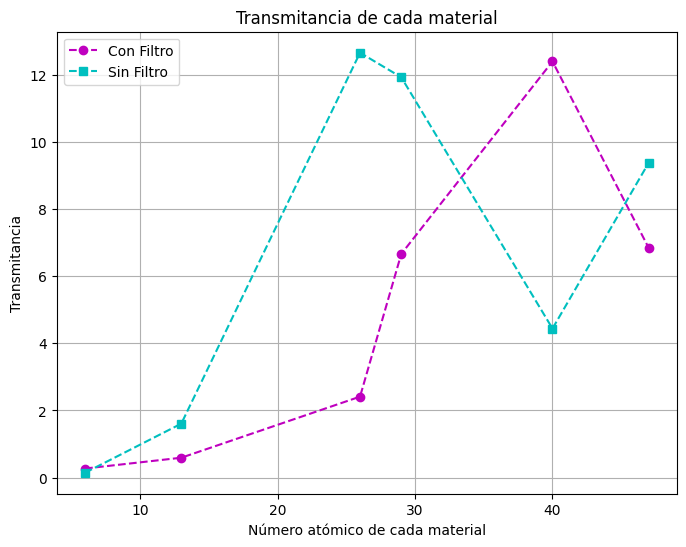

In [ ]:
#df_con_filtro['Material'] = np.log(df_con_filtro['Con Filtro'])

# --- Gráfica 3: Transmitancia vs materiales ---
plt.figure(figsize=(8,6))
plt.plot(dfmateriales['N'], dfmateriales['USin'], 'o--', color='m' , label='Con Filtro')
plt.plot(dfmateriales['N'], dfmateriales['UCon'], 's--', color='c' , label='Sin Filtro')
plt.xlabel('Número atómico de cada material')
plt.ylabel('Transmitancia')
plt.title('Transmitancia de cada material')
plt.legend()
plt.grid(True)
plt.show()